Brent's Method: Root found!
The root: 26.675891911547307 
Approximations: [23.5, 25.25, 26.125, 26.5625, 26.78125, 26.675742195386345, 26.67589197545815, 26.67589191154727, 26.675891911547307, 26.675891911547307, 26.675891911547307, 26.675891943502727, 26.675891927525015, 26.675891919536163, 26.675891915541733, 26.67589191354452, 26.675891912545914, 26.67589191204661, 26.67589191179696, 26.67589191167213, 26.675891911609718] 



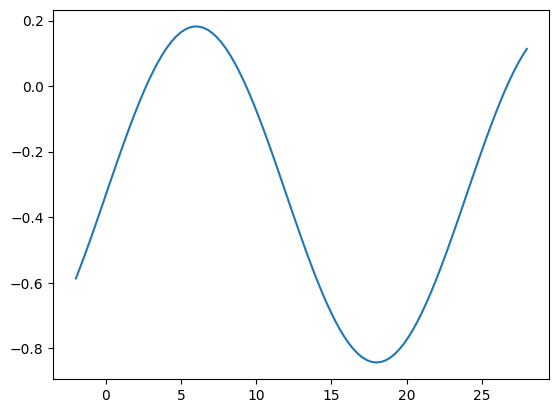

In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.patches as patches 
from scipy import stats



def tfunc( t ):
    alpha = np.pi/2
    theta = (np.pi*56)/180
    delta = (np.pi*23.5)/180
    y = np.cos(alpha) * np.cos(theta) * np.cos((2*np.pi*t)/24) + np.cos(theta) * np.sin(alpha) * np.cos(delta) * np.sin((2*np.pi*t)/24) - np.sin(theta) * np.sin(delta) * np.sin(alpha)
    return y


# Implementation of Brent's method
#
# INPUTS  
#
#    func: the function which we will find the root of
#    p0:   the first approximation to the root
#	 p1:   the second approximation to the root
#	 n0:   the maximum number of iterations to use
#	 tol:  the tolerance to which we wish to find the root
#
# OUTPUTS
#
#    p:    the root of the function
#    pall: all the roots found
#    info: flag to highlight if the root has been found 
#          within n0 iterations. If it has, info = 1.
#          If not, info = 0.


def brents(func, p0, p1, n0, tol):
    q0 = func(p0)
    q1 = func(p1)
    pall = []
    piqi = []
    ps = []
    pb = []

    mflag = True
    info = False

    i = 3
    
    assert q0*q1 <= 0, 'The root is not bracketed'

    #insures that p1 is the better approx to the root
    if abs(q0) < abs(q1):
        p0,p1 = p1,p0
        q0,q1 = q1,q0

    #creates a third point equal to the first point
    p2 = p0
    q2 = q0

    while i < n0:
        q0 = func(p0)
        q1 = func(p1)
        q2 = func(p2)
        
        if q0 != q2 and q1 != q2: #completes IQI if there are three unique points (not initially true)
            term1 = (p0*q1*q2) / ( (q0-q1) * (q0-q2) )
            term2 = (p1*q0*q2) / ( (q1-q0) * (q1-q2) )
            term3 = (p2*q1*q0) / ( (q2-q0) * (q2-q1) )
            p = term1 + term2 + term3 
            piqi.append(i) #adds the index, i, to a list to create a colour coded graph later
        else: #if there are only two points we complete the Secant method
            p = p1 - ( (q1 * (p1-p0)) / (q1-q0) )
            ps.append(i) #adds the index, i, to a list to create a colour coded graph later
            

        if (p> ((3 * p0+p1) / 4) and p<p1) \
           or (mflag == True and abs(p-p1) >= abs(p1-p2)/2) \
           or (mflag == False and abs(p-p1) >= abs(p2-d)/2) \
           or (mflag == True and abs(p1-p2) < abs(tol)) \
           or  (mflag == False and abs(p2-d) < abs(tol)): #checks whether to do Bisection method
            
            p = (p0+p1)/2 #Bissection Method
            pb.append(i) #adds the index, i, to a list to create a colour coded graph later
            mflag = True
        else:
            mflag = False

        q = func(p)
        d = p2
        p2 = p1

        if (q0*q) < 0:
            p1 = p
        else:
            p0 = p
        
        if abs(q0) < abs(q1): #Ensures q1 is the better approx
            p0,p1 = p1,p0
            
        pall.append(p)
        i += 1

        if abs(p1-p0) < tol: #Checks whether the approx is good enough and ends the loop if so
            info = True
            break

    return p1,pall,info,piqi,ps,pb




#
# Calling Functions
#


#Brent's Method
root_b, approxs_b, info_b, piqi, ps, pb= brents( tfunc,  20, 27, 500, 1e-10)

if info_b == 1:
    print("Brent's Method: Root found!\nThe root:",root_b,"\nApproximations:",approxs_b,"\n")
else:
    print("Brent's Method: Root not found.\nApproximations:",approxs_b,"\n")




#
#Graphs to plot
#


         #Brent's Method Error graph
plot_poly = True        




#
#Graphs
#
#function graphs

if plot_poly: 
    t = np.linspace(-2,28,100)
    alpha = np.pi/2
    theta = (np.pi*56)/180
    delta = (np.pi*23.5)/180
    y = np.cos(alpha) * np.cos(theta) * np.cos((2*np.pi*t)/24) + np.cos(theta) * np.sin(alpha) * np.cos(delta) * np.sin((2*np.pi*t)/24) - np.sin(theta) * np.sin(delta) * np.sin(alpha)
    plt.plot(t,y)
    #plt.xlim(-0.82,1.24)
    #plt.ylim(-0.3, 0.4)

   
    